<a href="https://colab.research.google.com/github/iyoob-utexas/ds4e/blob/main/notebooks/n10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

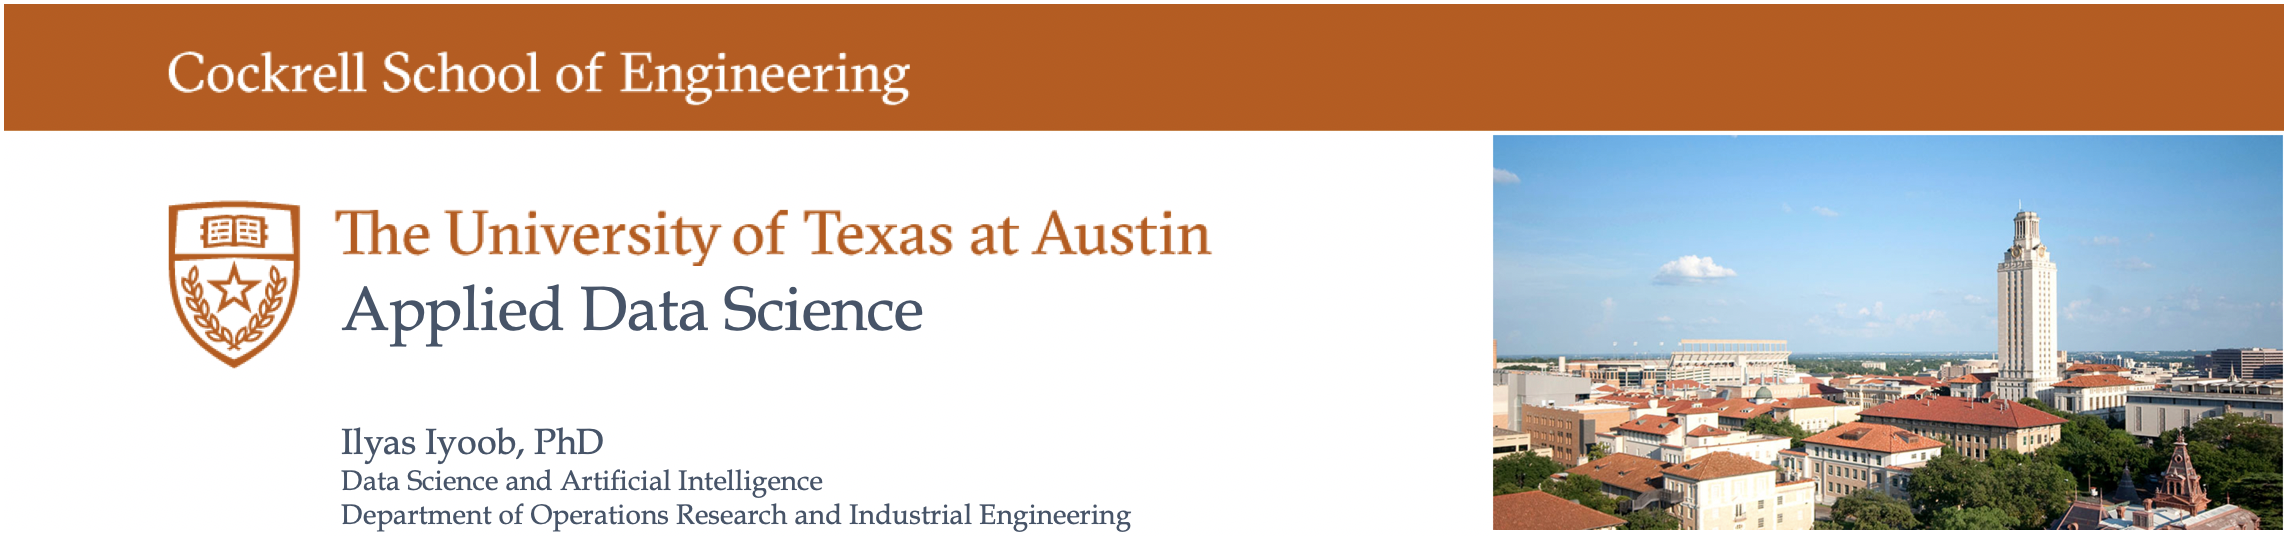

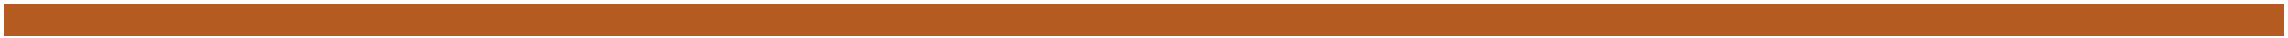

## <font color='#475468'> Pretrained Models:</font>
### <font color='#475468'> Can you speed up your efforts using pretrained models?</font>

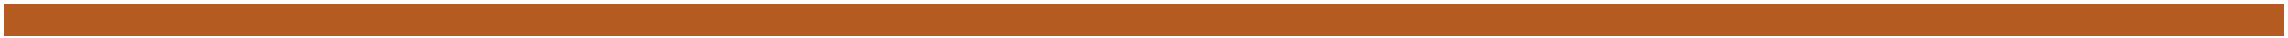

# Transfomers

Pretrained chains of models that perform specific tasks

## Initialize

In [1]:
!pip install transformers

In [2]:
# Use pipelines to access pre-trained models
from transformers import pipeline

## Sentiment Analysis

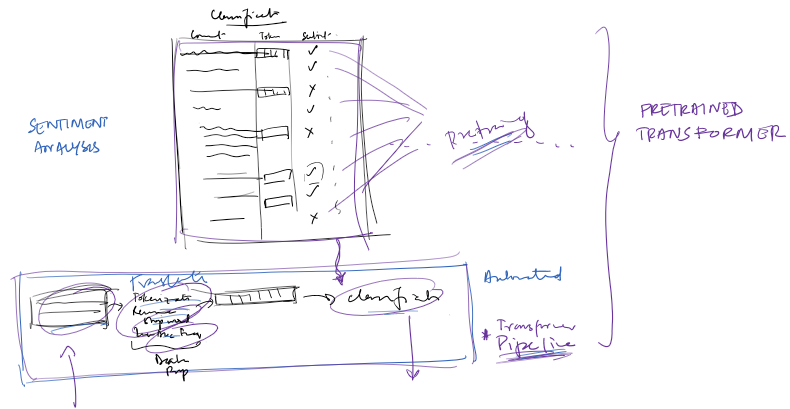

In [4]:
# Model
mdlSnt = pipeline('sentiment-analysis')

# Parameters
#prmStatement = 'We are happy to go on vacation this spring break.'
prmStatement = ['It is nice to have you here in the US.  I heard the weather is terrible in the UK.',
        'I am struggling with stress']
# Predict
mdlSnt(prmStatement)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.8162758350372314},
 {'label': 'NEGATIVE', 'score': 0.9937747716903687}]

Can perform sentiment analysis in other languages as well using `model = 'nlptown/bert-base-multilingual-uncased-sentiment'`

In [5]:
# Model
mdlSnt = pipeline('sentiment-analysis', model = 'nlptown/bert-base-multilingual-uncased-sentiment')

# Parameters
prmStatement = 'hace mucho calor' #spanish for: the weather is very hot

# Predict
mdlSnt(prmStatement)

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

[{'label': '2 stars', 'score': 0.278725266456604}]

The result is in stars as opposed to score... this is as per the model definition.  See model details in HF for more details.

## Question Answering

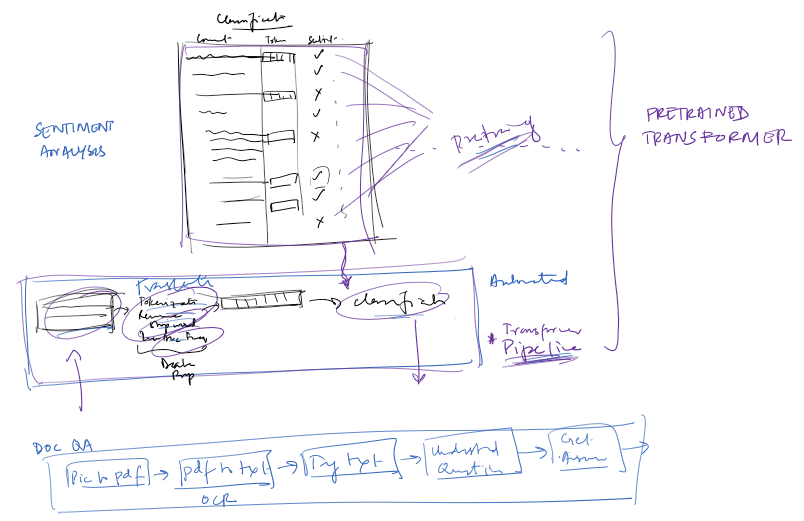

### Example 1

In [7]:
# Model
mdlQa = pipeline("question-answering")

# Parameters
f = open("/content/drive/MyDrive/Colab Notebooks/data/hf.txt", "r")
context = f.read()
#context = "Hugging Face, Inc. is an American company that develops tools for building applications using machine learning. It is most notable for its Transformers library built for natural language processing applications and its platform that allows users to share machine learning models and datasets. The company was founded in 2016 by Clément Delangue, Julien Chaumond, and Thomas Wolf originally as a company that developed a chatbot app targeted at teenagers. After open-sourcing the model behind the chatbot, the company pivoted to focus on being a platform for democratizing machine learning. In March 2021, Hugging Face raised $40 million in a Series B funding round. On April 28, 2021, the company launched the BigScience Research Workshop in collaboration with several other research groups to release an open large language model. In 2022, the workshop concluded with the announcement of BLOOM, a multilingual large language model with 176 billion parameters. On December 21, 2021, the company announced its acquisition of Gradio, a software library used to make interactive browser demos of machine learning models. On May 5, 2022, the company announced its Series C funding round led by Coatue and Sequoia.The company received a $2 billion valuation. On May 13, 2022, the company introduced its Student Ambassador Program to help fulfill its mission to teach machine learning to 5 million people by 2023. On May 26, 2022, the company announced a partnership with Graphcore to optimize its Transformers library for the Graphcore IPU. On August 3, 2022, the company announced the Private Hub, an enterprise version of its public Hugging Face Hub that supports SaaS or on-premise deployment. In February 2023, the company announced partnership with Amazon Web Services (AWS) which would allow Hugging Face's products available to AWS customers to use them as the building blocks for their custom applications. The company also said the next generation of BLOOM will be run on Trainium, a proprietary machine learning chip created by AWS."
question = "Who founded Hugging Face?"

# Predict
mdlQa(question = question, context = context)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.9877728819847107,
 'start': 1466,
 'end': 1475,
 'answer': 'Graphcore'}

### Example 2

In [8]:
# Model
mdlQa = pipeline("question-answering")

# Parameters
f = open("/content/drive/MyDrive/Colab Notebooks/data/IBM_FlashSystem_9100_Architectur_Performance_and_Implementation.txt", "r")
context = f.read()
question = "What is RACE?"

# Predict
mdlQa(question = question, context = context)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.989109456539154,
 'start': 89480,
 'end': 89512,
 'answer': 'Random Access Compression Engine'}

# Generative Pretrained Transformers

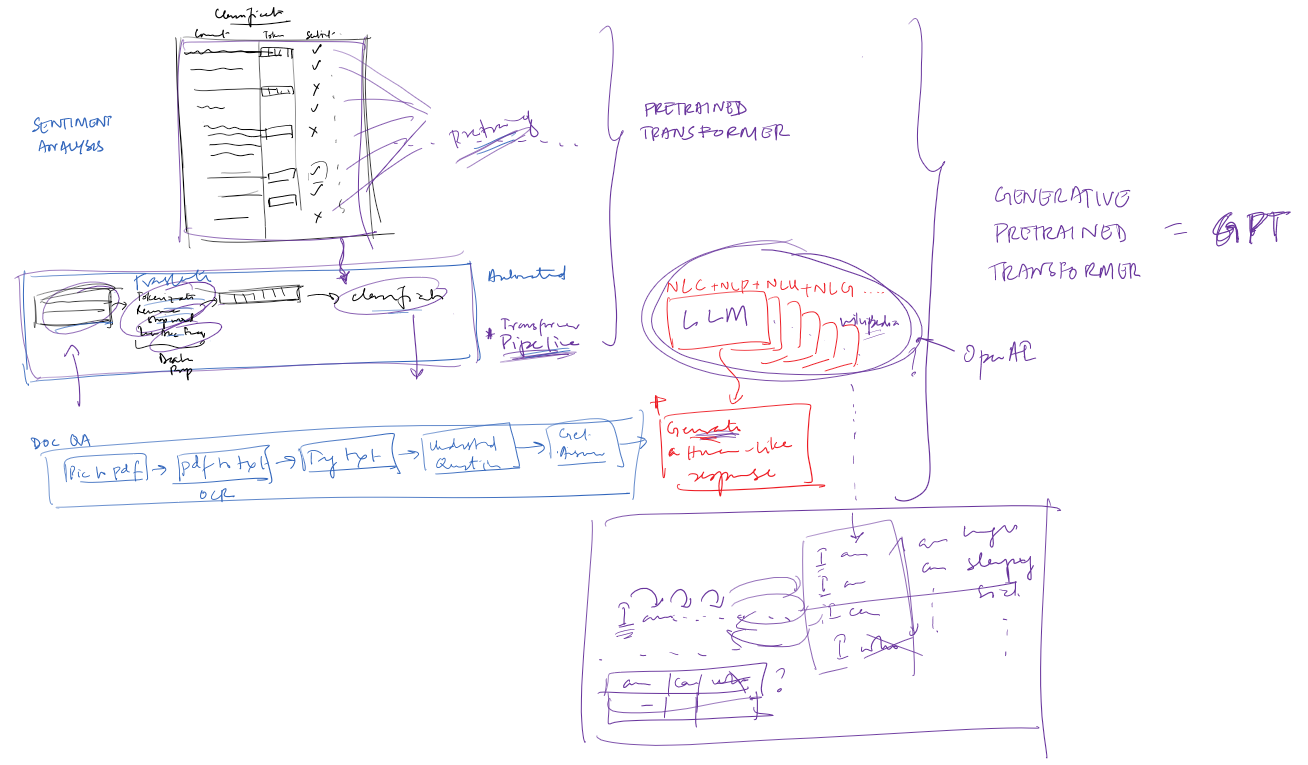

## Initialize

In [9]:
!pip install --upgrade pip
!pip install openai==0.28

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.7 MB/s eta 0:00:00


In [10]:
!pip install colab-env -qU
import colab_env

  Preparing metadata (setup.py) ... done
Mounted at /content/gdrive


## Question Answering

In [14]:
import os
import openai

# Set up the OpenAI API client
openai.api_key = os.getenv("OPENAI_API_KEY")

# Set up the model and prompt
model_engine = "gpt-3.5-turbo-instruct"
prompt = "top 10 cities in the world by population?"

# Generate a response
completion = openai.Completion.create(
    engine=model_engine,
    prompt=prompt,
    max_tokens=1024,
    n=1,
    stop=None,
    temperature=0,
)

response = completion.choices[0].text
print(response)



1. Tokyo, Japan
2. Delhi, India
3. Shanghai, China
4. Sao Paulo, Brazil
5. Mumbai, India
6. Mexico City, Mexico
7. Beijing, China
8. Osaka, Japan
9. Cairo, Egypt
10. New York City, United States
